In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cec2017.functions import *
import sys
sys.path.append('../')
from ccde.algorithms import CCDE, PCCDE

In [30]:
from cec2017.functions import *
from os.path import exists

GET_FUNCTION = {"1": f1, "2": f2, "3": f3, "4": f4, "5": f5, "6": f6, "7": f7, "8": f8, "9": f9, "10": f10,
                "11": f11, "12": f12, "13": f13, "14": f14, "15": f15, "16": f16, "17": f17, "18": f18, "19": f19, "20": f20,
                "21": f21, "22": f22, "23": f23, "24": f24, "25": f25, "26": f26, "27": f27, "28": f28, "29": f29, "30": f30}

class CCDE_cec2017:
    def __init__(self, fnum=1, dimensions=100, default_bounds=(-100, 100), max_FES=3e+05, num_runs=31,
                    popsize=100, mutation_rate=0.8, crossover_rate=0.9, NC=None, strategy='rand1bin',
                    seed=None, save_file_name=None):
        problem = GET_FUNCTION.get(str(fnum))
        bounds = [default_bounds] * dimensions
        fstar = fnum * 100
        self.num_runs = num_runs
        self.algo_name = "CCDE"
        self.NC = NC
        self.NC_text = f"_NC{NC}"
        if NC == None or NC == 0:
            self.algo_name = "DE"
            self.NC_text = ""
        self.model = CCDE(fobj=problem, bounds=bounds, strategy=strategy,
             mutation=mutation_rate, crossover=crossover_rate,
             NC=NC, maxfes=max_FES, popsize=popsize, seed=seed, fstar=fstar)
        self.outputs = None
        self.save_file_name = save_file_name
        if save_file_name == None:
            self.save_file_name = f"results/{self.algo_name}_f{fnum}_{dimensions}D_MR{mutation_rate}_CR{crossover_rate}_{strategy}{self.NC_text}.npz"
        self.popsize = popsize
        self.max_FES = max_FES

    def run(self, continue_to_last_run=True, show_progressbar=True):
        best_candidate, all_best_fitness, all_mean_fitness = [], [], []
        last_run = 0
        if exists(self.save_file_name) and continue_to_last_run:
            loadnpz = np.load(self.save_file_name)
            best_candidate, all_best_fitness, all_mean_fitness = loadnpz["best_candidate"], loadnpz["all_best_fitness"], loadnpz["all_mean_fitness"]
            last_run = len(best_candidate)
            print(f"The last saved run was {last_run} and the experiment will continue from the last...")
        for run in range(last_run, self.num_runs):
            self.outputs = self.model.solve(show_progress=True)
            
            print(f"Run {run+1}, Best Error: {self.outputs[1]:E}")
            if run != 0:
                best_candidate = np.append(best_candidate, [self.outputs[0]], axis=0)
                all_best_fitness = np.append(all_best_fitness, [self.outputs[2]], axis=0)
                all_mean_fitness = np.append(all_mean_fitness, [self.outputs[3]], axis=0)
            else:
                best_candidate = [self.outputs[0]]
                all_best_fitness = [self.outputs[2]]
                all_mean_fitness = [self.outputs[3]]
            np.savez(self.save_file_name, best_candidate=best_candidate,
                    all_best_fitness=all_best_fitness, all_mean_fitness=all_mean_fitness)
            
        best_f = all_best_fitness[:, -1]
        print("Best:", "{:e}".format(np.amin(best_f)))
        print("Median:", "{:e}".format(np.median(best_f)))
        print("Worst:", "{:e}".format(np.amax(best_f)))
        print("Mean:", "{:e}".format(np.mean(best_f)))
        print("Std:", "{:e}".format(np.std(best_f)))
        
    def plot(self, figsize=(12, 5)):
        loadnpz = np.load(self.save_file_name)
        all_best_fitness = loadnpz["all_best_fitness"]
        
        intervals = np.arange(self.popsize, self.max_FES+1, self.popsize)
        fig, ax = plt.subplots(figsize=(12, 5))
        label_text = ""
        if self.NC != 0:
            label_text = f"({self.NC_text}-clusters)"
        ax.plot(intervals, np.mean(all_best_fitness, axis=0), label=f"{self.algo_name}{label_text}")
        ax.set_yscale("log")
        ax.ticklabel_format(axis='x', style='sci', scilimits=[-1,1],useMathText=True)
        ax.set_xlabel('Function Evaluations (FES)')
        ax.set_ylabel('f(x)-f(x*)')
        ax.set_title('Logarithmic scale')
        ax.grid()
        plt.legend(loc='best')
        plt.show()
          


In [23]:
test = CCDE_cec2017(fnum=1, dimensions=100, NC=10)

In [4]:
test.run(continue_to_last_run=True)

Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 1, Best Error: 9.096531E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 2, Best Error: 1.369163E+04


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 3, Best Error: 3.906713E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 4, Best Error: 4.126603E+01


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 5, Best Error: 9.974882E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 6, Best Error: 1.526832E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 7, Best Error: 7.580804E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 8, Best Error: 4.339064E+01


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 9, Best Error: 1.244823E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 10, Best Error: 2.643729E+02


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 11, Best Error: 5.785043E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 12, Best Error: 6.465715E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 13, Best Error: 4.964266E+00


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 14, Best Error: 1.905182E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 15, Best Error: 1.448311E+02


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 16, Best Error: 1.647646E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 17, Best Error: 7.490657E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 18, Best Error: 6.431317E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 19, Best Error: 6.123388E+01


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 20, Best Error: 6.771466E+02


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 21, Best Error: 1.965195E+02


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 22, Best Error: 5.033690E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 23, Best Error: 3.848016E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 24, Best Error: 3.057488E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 25, Best Error: 4.009262E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 26, Best Error: 3.537695E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 27, Best Error: 5.241768E+03


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 28, Best Error: 1.240610E+04


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 29, Best Error: 1.531933E+04


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 30, Best Error: 2.276457E+00


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 31, Best Error: 1.039802E+04


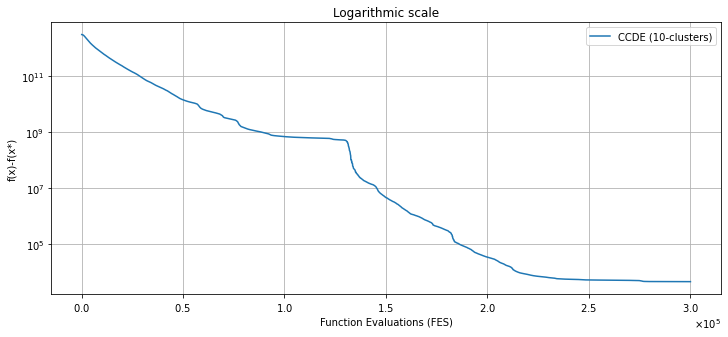

In [18]:
test.plot()

In [31]:
test = CCDE_cec2017(fnum=1, dimensions=100, NC=0)

In [33]:
test.run(continue_to_last_run=True, show_progressbar=False)

The last saved run was 3 and the experiment will continue from the last...


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 4, Best Error: 3.526545E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 5, Best Error: 2.034353E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 6, Best Error: 2.784500E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 7, Best Error: 2.233611E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 8, Best Error: 3.229127E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 9, Best Error: 3.922240E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 10, Best Error: 2.595321E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 11, Best Error: 3.200486E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 12, Best Error: 2.887635E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 13, Best Error: 2.973146E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 14, Best Error: 2.096951E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 15, Best Error: 2.335956E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 16, Best Error: 2.457406E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 17, Best Error: 2.035789E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 18, Best Error: 2.800199E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 19, Best Error: 2.607347E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 20, Best Error: 2.527688E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 21, Best Error: 3.419079E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 22, Best Error: 1.773528E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 23, Best Error: 2.649543E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 24, Best Error: 2.238601E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 25, Best Error: 2.388556E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 26, Best Error: 2.634209E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 27, Best Error: 1.896984E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 28, Best Error: 2.437475E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 29, Best Error: 3.664983E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 30, Best Error: 2.742436E+11


Optimizing (CCDE):   0%|          | 0/3000 [00:00<?, ?it/s]

Run 31, Best Error: 1.876986E+11


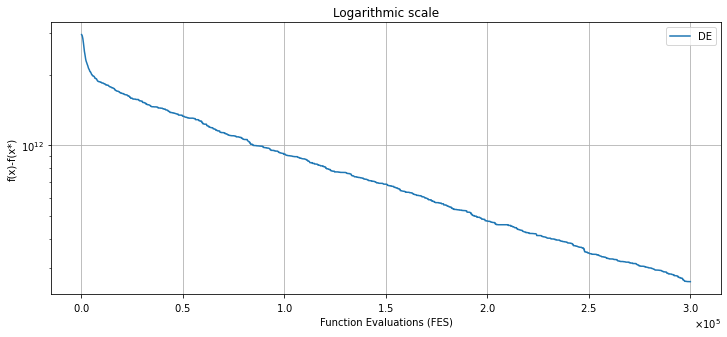

In [34]:
test.plot()